# Credit Card Application

Banks and financial institutions often need to predict customer behavior, such as the likelihood of a customer accepting a loan offer, to target their marketing efforts effectively. This helps in increasing the acceptance rate of their offers while reducing marketing costs.

Our objective is to create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized, and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

We import necessary libraries to handle data manipulation, visualization, and model building. These libraries provide functions to simplify complex operations, ensuring efficient data processing and analysis.

Code and questions answered by Neel Parimi and Anusha Desai

# Grading Scheme:

1. **Importing Libraries and Data (10 points)**
   - Correctly import all required libraries; remove any unncessary libraries: 5 points
   - Correctly read the dataset: 5 points

2. **Data Exploration (20 points)**
   - Correctly display dimensions, first and last entries: 10 points
   - Correctly display descriptive statistics: 10 points

3. **Handling Missing Values (20 points)**
   - Correctly impute missing numeric values: 10 points
   - Correctly impute missing non-numeric values: 10 points

4. **Data Pre-processing (20 points)**
   - Correctly encode non-numeric data: 10 points
   - Correctly plot histograms and heatmap: 10 points

5. **Model Building (30 points)**
   - Correctly split data into train and test sets: 10 points
   - Correctly scale the data: 10 points
   - Correctly build and fit the logistic regression model: 10 points

6. **Model Evaluation (30 points)**
   - Correctly calculate and display confusion matrix: 10 points
   - Correctly calculate and plot the ROC curve: 20 points
 
7. **Answering Red Questions**
   - Correctly answer all subjective questions in red: 20 points


Total: 150 points

## 1. Importing Libraries- Anusha

In [1]:
# KEEP ONLY THE REQUIRED LIBRARIES; REMOVE OTHERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

## <span style="color:red">*Q1. Why only the required libraries are kept in the code?*</span>

The required libraries are kept in the code for various reasons. Firstly, if we load in unnecessary libraries, we would have to load and maintain such extra resources which we are not going to use. This also takes up more memory and could make the execution of the code slow. When we add in more libraries, we may introduce the possibilities of bugs or problems with other existing libraries because they won't necessarily be compatible with each other. Finally, when we maintain the practice of importing only the required libraries, the code becomes clear, concise and easy to interpret.

## 2) Importing and Descriptive Stats- Anusha

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [2]:
# READ DATA
data = pd.read_excel("Approval.xlsx")
data.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


**Instructions:**
1. Get the dimensions of the array and print them.
2. Verify if the correct dataset was imported by checking the first 15 entries.
3. Verify by checking the last five entries.
4. Display descriptive statistics of the dataset.

In [3]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape

(690, 16)

In [4]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
data.head(15)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [5]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
data.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [6]:
# DESCRIPTIVE STATS
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None


In [7]:
# DESCRIPTIVE STATS
print(data.describe)

<bound method NDFrame.describe of      Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     

## 3) Handling Missing Values- Neel

Missing values in the dataset can lead to incorrect analysis and model predictions. Imputing missing values ensures the integrity of the dataset, making it possible to build reliable models.

**Instructions:**
1. Check for missing values.
2. Impute missing values for numeric data using the mean and for non-numeric data using the mode.

In [8]:
# CHECK FOR MISSING VALUES
missing_values = data.isnull().sum()
print(missing_values)

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [9]:
# IMPUTE MISSING VALUES

# for numeric data using mean
missing_numcols = data.select_dtypes(include='number')

for col in missing_numcols:
    mean = data[col].mean()
    data[col] = data[col].fillna(mean)


In [10]:
# For non numeric data using mode
missing_catcols = data.select_dtypes(include='object')
for col in missing_catcols:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)

In [11]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## <span style="color:red">*Q2. Is there any missing data at all?*</span>

No, there isn't any missing data. This is seen from the zeroes next to each variable when we get the number of null values for each column.

## <span style="color:red">*Q3. Why do we impute mean for numeric and mode for non-numeric data?*</span>

For numerical data, the mean represents the average or most typical value in the data. By imputing the mean, it doesn't change the overall distribution of the data, and therefore is the best choice. It also preserves central tendency, statistical properties and variability.
For non-numeric data, we can't find a mean because the data consists of categorical values, so the next best option is the mode, which is the most frequent occurance. The mode doesn't change the distribution a lot and preserves the categorical structure, and is therefore the best choice.

## 4) Data Preprocessing- Neel

Data preprocessing is crucial for preparing raw data for analysis. Converting non-numeric data to numeric forms, such as one-hot encoding, ensures compatibility with machine learning algorithms, which typically require numerical input.

In [12]:
# CONVERTING ALL NON-NUMERIC DATA TO NUMERIC - USING ONE-HOT ENCODING

# This gives 86.2% accuracy in the Random Forest Model
# Instantiate OneHotEncoder
#ohe = OneHotEncoder(sparse_output=False)

# Identify categorical columns
#categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
#for col in categorical_cols:
#    encoded_columns = pd.DataFrame(ohe.fit_transform(data[[col]]), columns=ohe.get_feature_names_out([col]))
#    data = pd.concat([data, encoded_columns], axis=1)
#    data.drop(col, axis=1, inplace=True)

#data.head(10)

# This gives 85.5% accuracy in the Random Forest Model
# INSTANTIATE LABELENCODER
ohe = OneHotEncoder(sparse_output=False)

# Creating a new DataFrame for storing transformed data
data_transformed = pd.DataFrame()

for column in data.columns:
    print(f"Processing column: {column}")
    if data[column].dtypes == 'object':
        # One-hot encode the column if it's object type
        transformed = ohe.fit_transform(data[[column]])
        # Set the column name of one-hot encoded DataFrame as column_value
        encoded_data = pd.DataFrame(transformed, columns=ohe.get_feature_names_out([column]))
        # Concatenate to the transformed DataFrame
        data_transformed = pd.concat([data_transformed, encoded_data], axis=1)
    else:
        # If not object type, just copy the data
        data_transformed[column] = data[column]

data = data_transformed

data.head(10)

Processing column: Gender
Processing column: Age
Processing column: Debt
Processing column: Married
Processing column: BankCustomer
Processing column: Industry
Processing column: Ethnicity
Processing column: YearsEmployed
Processing column: PriorDefault
Processing column: Employed
Processing column: CreditScore
Processing column: DriversLicense
Processing column: Citizen
Processing column: ZipCode
Processing column: Income
Processing column: Approved


,Gender,Age,Debt,Married,BankCustomer,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,Industry_Energy,...,PriorDefault,Employed,CreditScore,DriversLicense,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1.0,0.0,0.0,202,0,1
1,0,58.67,4.460,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,6,0,1.0,0.0,0.0,43,560,1
2,0,24.50,0.500,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,280,824,1
3,1,27.83,1.540,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,5,1,1.0,0.0,0.0,100,3,1
4,1,20.17,5.625,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.0,1.0,0.0,120,0,1
5,1,32.08,4.000,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,360,0,1
6,1,33.17,1.040,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,164,31285,1
7,0,22.92,11.585,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,80,1349,1
8,1,54.42,0.500,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,180,314,1
9,1,42.50,4.915,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,52,1442,1


## 5) Data Visualization- Anusha

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

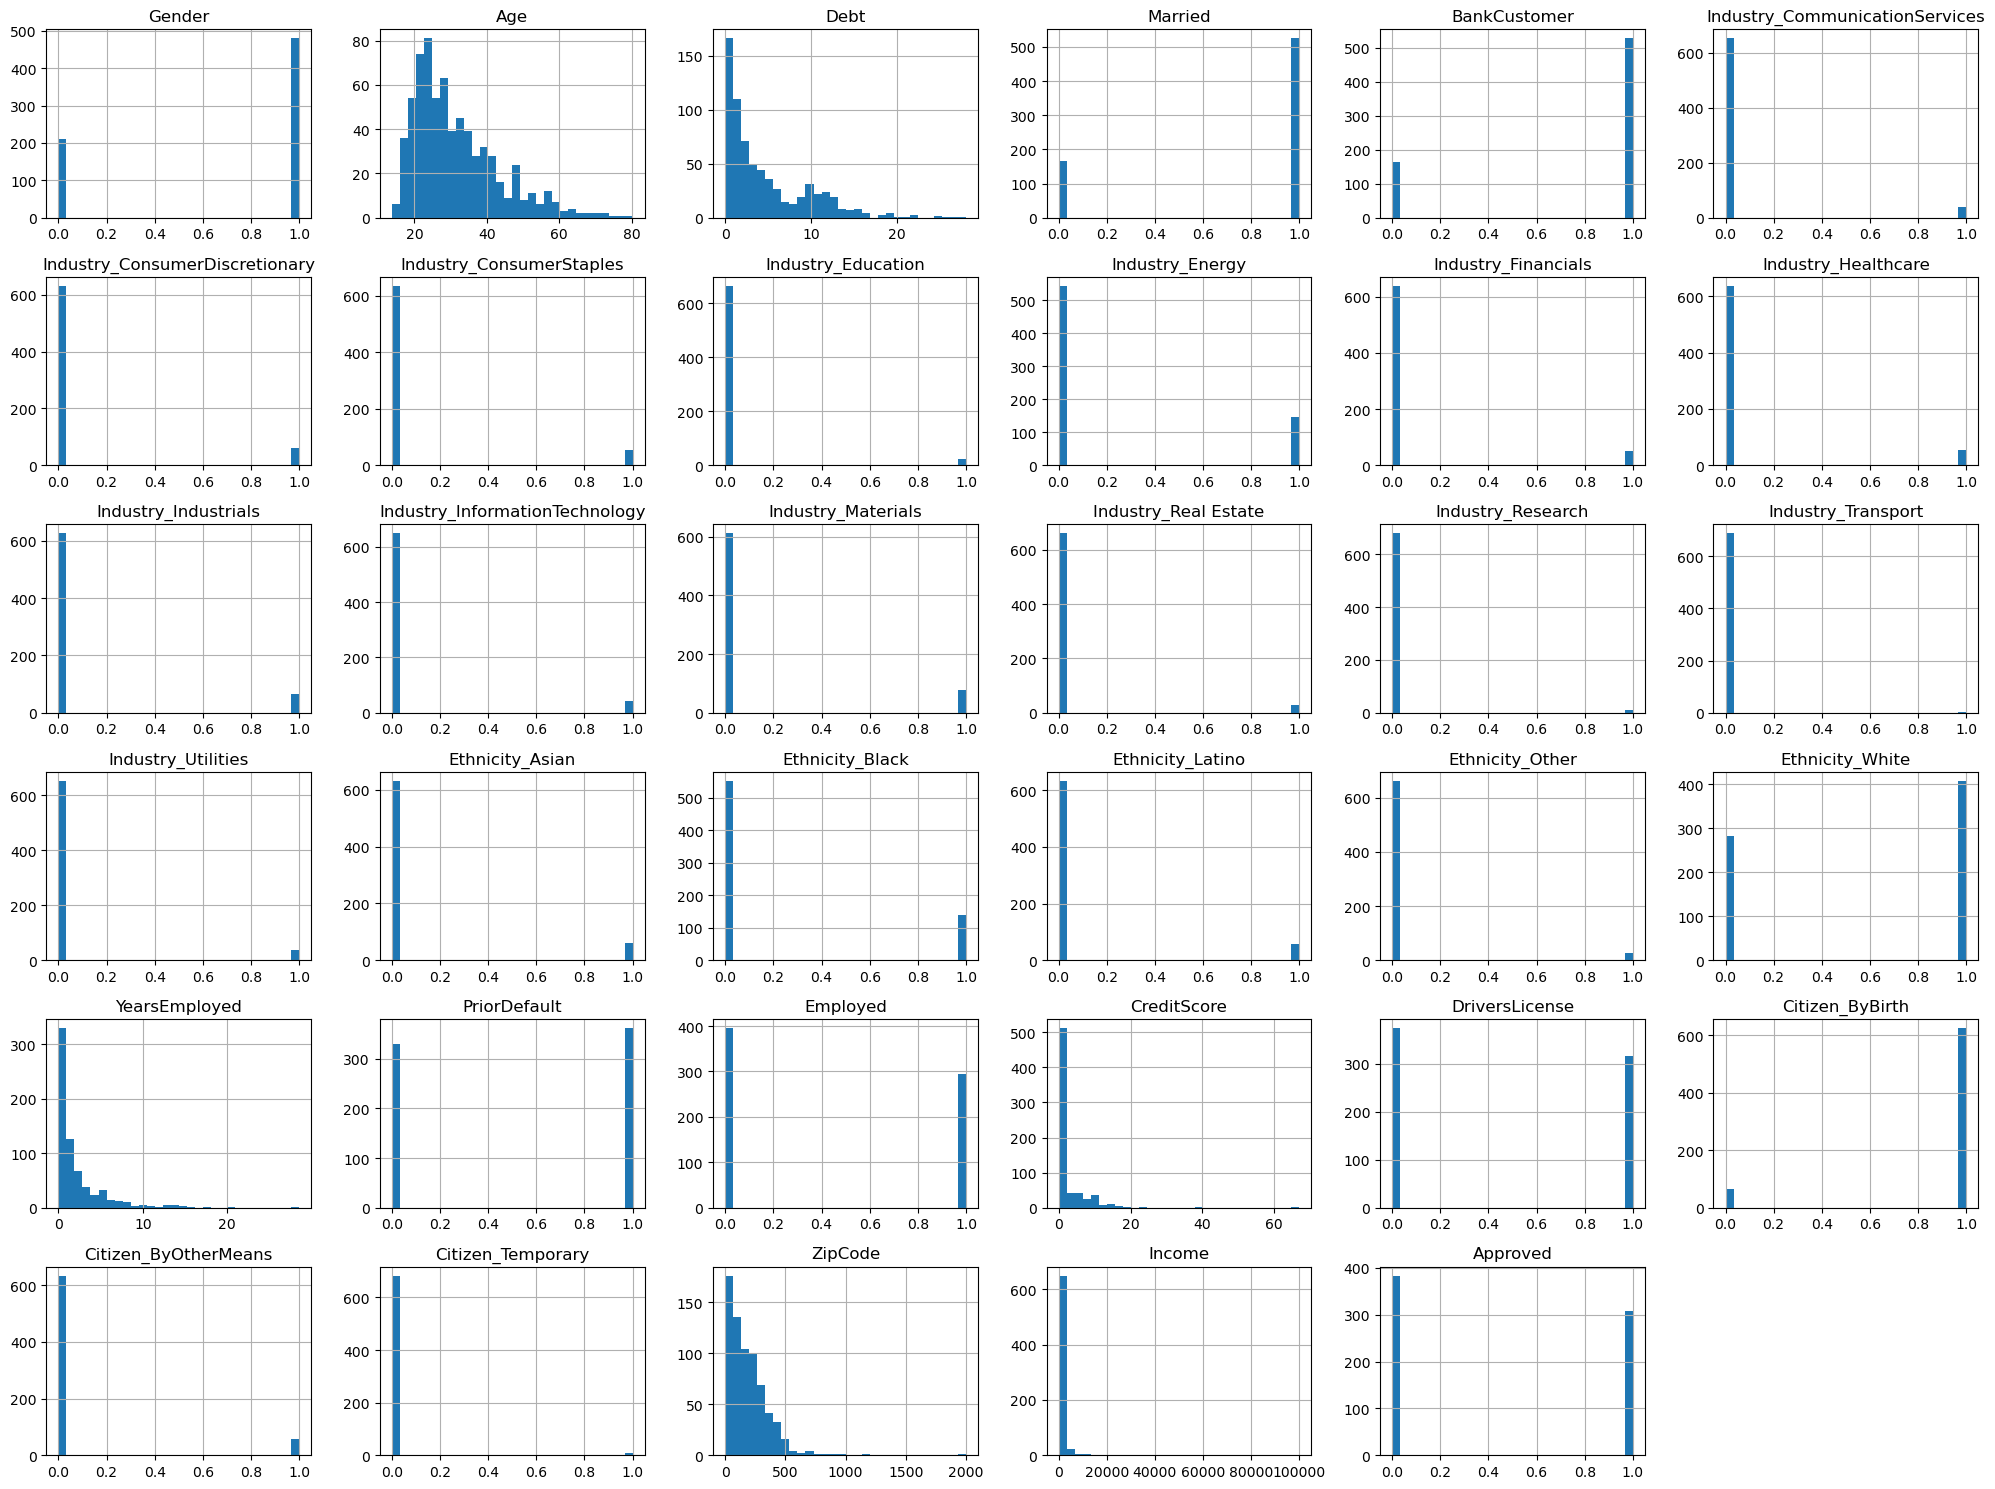

                                  Gender       Age      Debt       Married  \
Gender                          1.000000  0.035044 -0.041746 -6.806208e-02   
Age                             0.035044  1.000000  0.202177  1.069291e-01   
Debt                           -0.041746  0.202177  1.000000  7.464878e-02   
Married                        -0.068062  0.106929  0.074649  1.000000e+00   
BankCustomer                   -0.071250  0.099477  0.083781  9.920331e-01   
Industry_CommunicationServices  0.118261  0.036282 -0.073015  1.618915e-02   
Industry_ConsumerDiscretionary  0.022038  0.029670 -0.034094  2.562127e-02   
Industry_ConsumerStaples       -0.076991 -0.077206  0.023754 -1.375036e-02   
Industry_Education              0.027115  0.144554  0.134457 -3.952654e-04   
Industry_Energy                 0.080469 -0.058879 -0.058340 -1.736061e-02   
Industry_Financials             0.054436 -0.004216 -0.042265 -6.239164e-02   
Industry_Healthcare            -0.116737  0.166759  0.062583 -8.

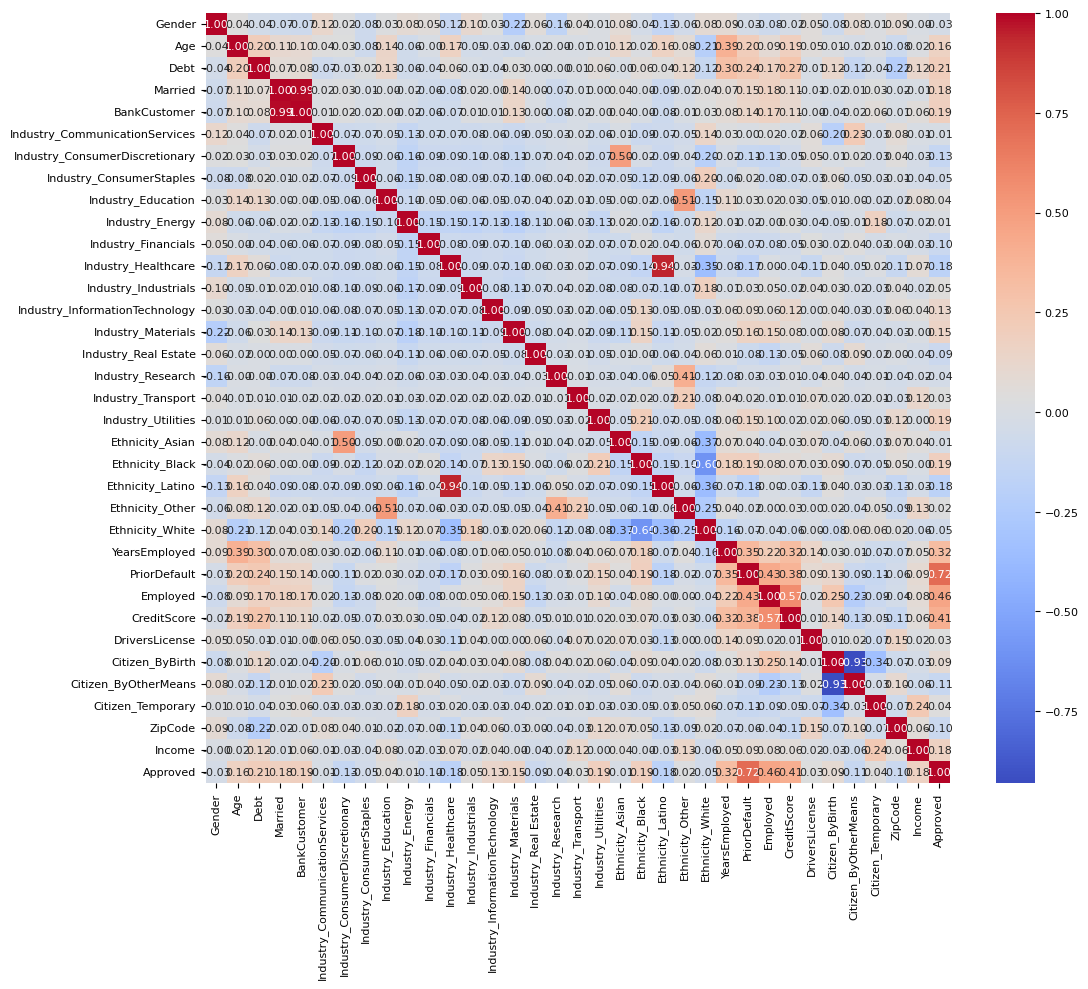

In [13]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# CALCULATE THE CORRELATION MATRIX
correlation_matrix = data.corr()

print(correlation_matrix)

# Decrease font size
plt.rcParams['font.size'] = 8

# PLOT THE HEATMAP
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()


## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

The histograms show different variables for gender, marital status, bank customer status, prior default, employment status, citizenship status, possession of a driver's license and loan approval status. These have fairly balanced distributions and are binary. Some variables like age, debt, credit score, years employed and income show right-skewed distributions which tells us that most of the people are low on these scales. The variable for zip code is spread out which explains geographical diversity among the people. Variables for industries and ethnicities are shown to be numerous binary columns, which means that there is presence of individuals in these sectors as well as regional diversity. While observing the overall picture, histograms are important because they give us insights on the distribution, skewness, and balance of data.

## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>

The correlation matrix helps us learn about how strong the variables are correlated to each other and in what direction. For instance, 'Married' and 'BankCustomer' have a correlation value of 0.992 which leads to a strong positive correlation, meaning that they usually occur at the same time. 'YearsEmployed' also shows positive correlation with 'Age' (0.391) and 'CreditScore' (0.322), which means that older individuals with higher credit scores tend to have a longer job history. In constrast to this, 'Ethnicity_Asian' is a negatively correlated to 'Ethnicity_White' (-0.368) because they don't appear together often. The matrix explains the positive and negative relationships between variables which may help in further analysis.
The visual version of a correlation matrix could be called a heatmap because it helps us understand how strong or weak variable relationships are. We usually look at only one half of the matrix since it is symmetrical. This is because both the triangles show identical information. For instance, Ethnicity_Latino and Healthcare have a very strong correlation. There are also other relationships like Approved and PriorDefault. However, this could be a problem because multicollinearity usually affects the model's performance.

## 6) Model Building- Anusha

Model building involves training a machine learning model to make predictions based on historical data. In this case, we are predicting the likelihood of a credit card application being approved. Splitting the data into training and testing sets ensures that we can evaluate the model's performance on unseen data, providing a realistic assessment of its accuracy.

In [14]:
# DROP THE VARIABLES NOT NEEDED- This step is not needed, and also reduces accuracy
# data.drop(['ZipCode', 'DriversLicense'], axis=1, inplace=True)

# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
X = data.drop('Approved', axis=1)
y = data['Approved']

# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Instructions:**
1. Scale the data using MinMaxScaler to ensure that all features contribute equally to the model. Scaling is important as it brings all features to a comparable range, improving the convergence of the learning algorithm.
2. Instantiate and fit a Logistic Regression model to the training set.

In [15]:
# The accuracy score for this Logistic Regression model is 84%

# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

## <span style="color:red">*Q6. Why is it important to split the data into training and testing sets?*</span>

It's important to split the data into training and testing sets for being able to evaluate the performance and accuracy of an ML model. It's also essential to prevent overfitting to ensure that the model is able to properly represent the population with good accuracy. It also helps in promoting the reliability of the model in real-world applications, and can also find problems in any previous steps before the splitting.

## 7) Model Evaluation- Anusha

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_test_scaled)

# print("Accuracy of logistic regression classifier: ", logreg.score(* <Your code here> *))
print("Accuracy of logistic regression classifier: ", log_reg.score(X_test_scaled,y_test))

# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL
confusion_matrix(y_test,y_pred)


Accuracy of logistic regression classifier:  0.8405797101449275


array([[56, 12],
       [10, 60]])

**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

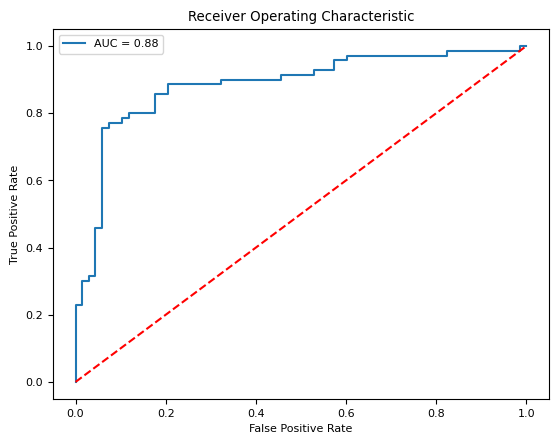

In [18]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score
# CALCULATE THE FPR AND TPR FOR ALL THRESHOLDS OF THE CLASSIFICATION
y_pred_prob=log_reg.predict_proba(X_test_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

# method to plot ROC Curve
plt.plot(fpr,tpr,label="AUC = {:.2f}".format(roc_auc_score(y_test,y_pred_prob)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

## <span style="color:red">*Q7. Can you code a similar model for random forest?*</span>

In [19]:
# Accuracy is 85.5%

# Import the required classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier with default parameters
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train_scaled,y_train)

# Re-instantiate the RandomForestClassifier with 200 trees
rf = RandomForestClassifier(n_estimators=200,random_state=42)

# Fit the model again on the training data
rf.fit(X_train_scaled,y_train)

# Predict the test set labels
y_pred = rf.predict(X_test_scaled)

# Compute and print the accuracy on test data
accuracy = rf.score(X_test_scaled,y_test)
print("Accuracy of random forest classifier: ",accuracy)

Accuracy of random forest classifier:  0.855072463768116


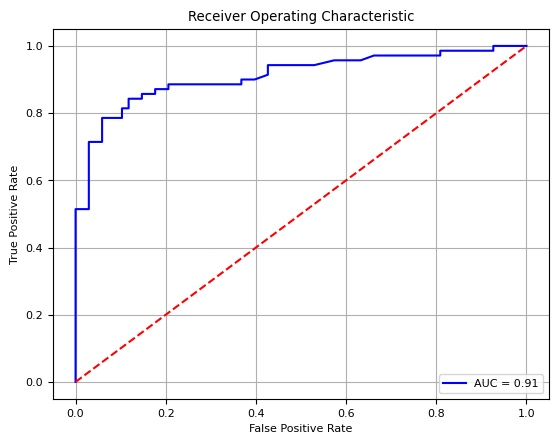

In [20]:
import sklearn.metrics as metrics

# Get the probability predictions for the positive class
probs = rf.predict_proba(X_test_scaled)[:,1]
preds = rf.predict(X_test_scaled)

# Compute false positive rate and true positive rate
fpr, tpr, threshold = metrics.roc_curve(y_test,probs)

# Compute the AUC score
roc_auc = metrics.auc(fpr,tpr)

# Plot ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='blue',
         label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0,1],[0,1],color='red',
         linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.grid()
plt.show()